# Exercício de Meanshit

O objetivo desse exercício é aplicar os conceitos e o algoritmo _meanshit_ em dois exemplos, um com valores criados e outro com valores reais.

## Base Criada

Criando os dados imaginários que serão utilizados para a clusterização:

In [55]:
from sklearn.datasets import make_blobs
position = [[6,6,3],[3,3,3],[1,1,5]]
X, y = make_blobs(n_samples = 500, centers = position, cluster_std = 0.70, random_state = 7)

Criando uma lista para armazenar os nomes da coluna:

In [56]:
cols = ['col1', 'col2', 'col3']

Importando a bibliteca _pandas_:

In [57]:
import pandas as pd

Criando um dataset com as _features_ X e o _target_ y:

In [58]:
df = pd.DataFrame(X, columns = cols)
df['target'] = y
df.head()

,col1,col2,col3,target
0,6.374114,5.743623,3.549400,0
1,1.058667,0.618878,5.314442,2
2,3.747425,3.761484,3.774482,1
3,6.108041,5.569459,3.535287,0
4,3.217708,3.051201,2.893890,1


Checando a quantidade alvo de _clusters_ e os seus tamanhos:

In [59]:
df['target'].value_counts()

0    167
1    167
2    166
Name: target, dtype: int64

### 1. Análise Preliminar dos Dados

Tamanho do banco de dados:

In [60]:
df.shape

(500, 4)

Análise descritiva dos dados:

In [61]:
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
col1,500.0,3.384133,2.097568,-0.878535,1.608825,3.025880,5.580763,7.581963
col2,500.0,3.282171,2.189912,-1.153705,1.368965,2.913138,5.554038,8.002747
col3,500.0,3.639907,1.169856,1.043651,2.767036,3.464161,4.516973,7.105134


### 2. Visualização dos Dados

Importando as bibliotecas necessárias:

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

Matriz de correlação:

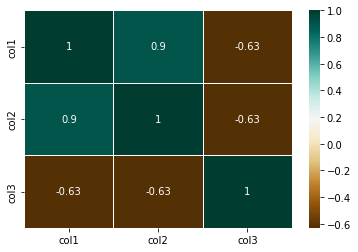

In [63]:
sns.heatmap(df[cols].corr(), annot = True, linewidths = 0.5, cmap = 'BrBG')
plt.show()

Observamos que a única correlação forte é entre as colunas 1 e 2.

Histogramas:

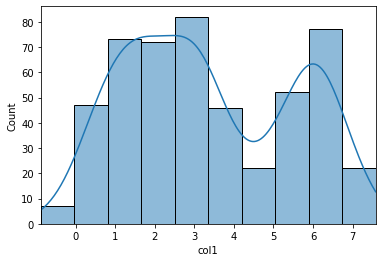

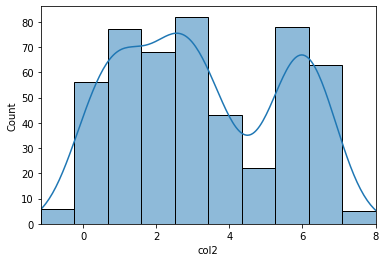

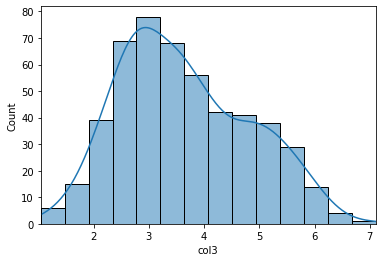

In [64]:
for i in cols:
    fig, ax = plt.subplots()
    sns.histplot(df[i], ax = ax, kde = True)
    ax.set_xlim(left = df[i].min(), right = df[i].max())
    plt.show()

Pela análise dos gráficos acima, é possível observar que os dados não seguem uma distribuição normal.

_Boxplots_:

<AxesSubplot:>

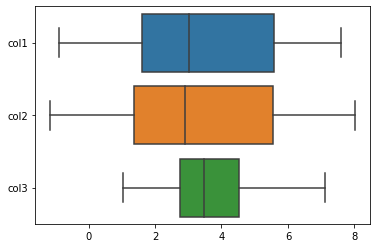

In [65]:
sns.boxplot(data = df[cols], orient = 'h')

A base de dados não contêm nenhum _outlier_.

_Pairplots_:

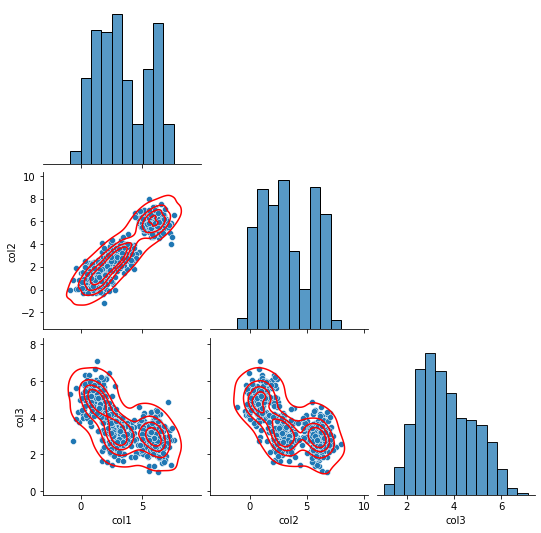

In [66]:
fig = sns.pairplot(data = df[cols], corner = True)
fig.map_offdiag(sns.kdeplot, levels = 5, color = 'r')

Os gráficos acima, plotados sem a especificação da coluna _target_, já nos dão um bom indicativo de que a _clusterização_ ideal para essa base seria de 2 ou 3 _clusters_.

### 2. Aplicação Básica do Meanshift

Importando as bibliotecas necessárias:

In [67]:
from sklearn.cluster import MeanShift

Criando o _e fittando_ o modelo:

In [68]:
msc = MeanShift().fit(df[cols])

Aplicando a clusterização à base de dados:

In [69]:
df['cluster'] = msc.labels_
centros_clusters = pd.DataFrame(msc.cluster_centers_, columns = cols)

Verificando os _clusters_ retornados e a quantidade de valores alocados em cada:

In [70]:
df['cluster'].value_counts()

0    168
2    166
1    166
Name: cluster, dtype: int64

Comparando o modelo _meanshift_ com o gabarito do _dataset_:

In [71]:
df.groupby('target')['cluster'].value_counts()

target  cluster
0       2          166
        0            1
1       0          166
        1            1
2       1          165
        0            1
Name: cluster, dtype: int64

Pela análise do retorno acima, podemos considerar que o modelo _meanshift_ teve um percentual de acerto mínimo 99,4 %.

### 3. Visualização dos resultados

Criando uma lista das possíveis combinações de todas as colunas:

In [72]:
# Importando a biblioteca necessária

from itertools import combinations

# Gerando a lista

combinacoes = list(combinations(cols, 2))

_Plotando_ os gráficos:

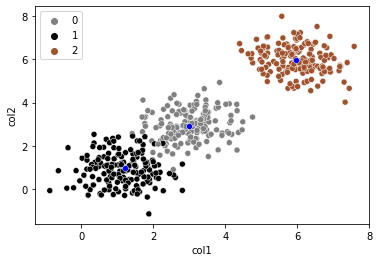

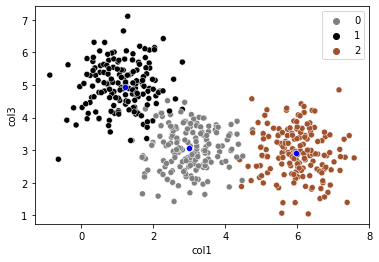

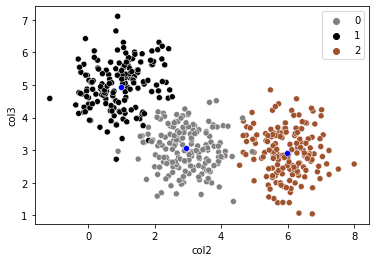

In [73]:
for i in combinacoes:
    plt.figure()
    sns.scatterplot(data = df, x = i[0], y = i[1], hue = 'cluster', palette = ['grey', 'black', 'sienna'])
    sns.scatterplot(data = centros_clusters, x = i[0], y = i[1], color = 'blue')
    plt.show()

## Base Real

Utilizando o dataset __clustering_gmm__, que contém informação de __altura__ e __peso__ de diversos indivíduos, iremos analisar as diferenças entre o MeanShift e o KMeans no processo de _clusterização_.

Importando e exibindo o banco de dados:

In [74]:
df = pd.read_csv(r'C:\Users\arnon\Documents\DNC\Exercícios\Clustering - Modelos Não Supervisionados II\Exercício - Meanshift\clustering_gmm.csv')
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


### 1. Análise Preliminar dos Dados

Tamanho do banco de dados:

In [75]:
df.shape

(500, 2)

Percentual de nulos de cada coluna:

In [76]:
df.isnull().sum()*100/len(df)

Weight    0.0
Height    0.0
dtype: float64

Tipos de dados:

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  500 non-null    float64
 1   Height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Verificando a variância dos dados:

In [78]:
# Importando a biblioteca necessária

from statistics import variance

variance(df['Weight']), variance(df['Height'])

(27.008554778827424, 23.08893902174416)

### 2. Visualização dos Dados

Matriz de correlação:

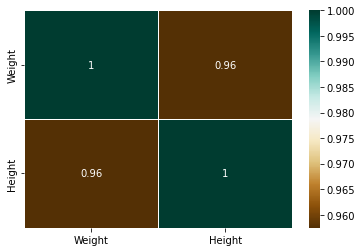

In [79]:
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, cmap = 'BrBG')
plt.show()

Observamos que as variáveis são altamente correlacionadas.

Histogramas:

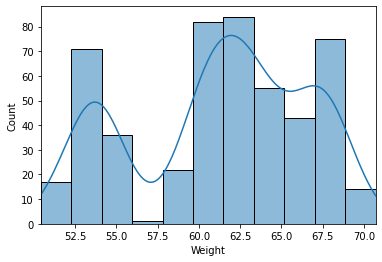

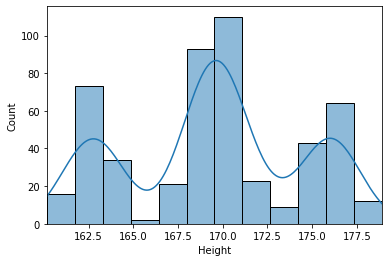

In [80]:
for i in df:
    fig, ax = plt.subplots()
    sns.histplot(df[i], ax = ax, kde = True)
    ax.set_xlim(left = df[i].min(), right = df[i].max())
    plt.show()

Pela análise dos gráficos acima, é possível observar que os dados não seguem uma distribuição normal.

_Boxplots_:

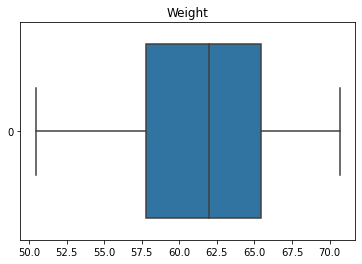

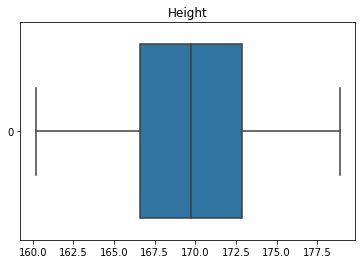

In [81]:
for i in df:
    plt.figure()
    plt.title(i)
    sns.boxplot(data = df[i], orient = 'h')
    plt.show()

A base de dados não contém _outliers_.

Gráfico de distribuição:

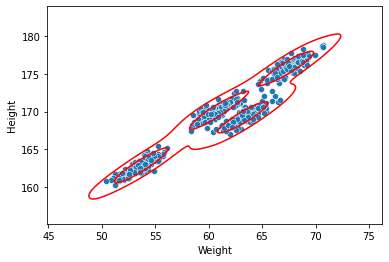

In [82]:
plt.figure()
sns.scatterplot(data = df, x = 'Weight', y = 'Height')
sns.kdeplot(data = df, x = 'Weight', y = 'Height', levels = 3, color = 'r')
plt.show()

O gráfico anterior indica que a massa de dados deve ser dividida em 4 _clusters_.

### 3. Método Elbow

Importando a biblioteca necessária:

In [83]:
from sklearn.cluster import KMeans

Aplicando o método:

In [84]:
inertias = []
for k in range(1, 10):
    model_km = KMeans(n_clusters = k).fit(df)
    inertias.append(model_km.inertia_)

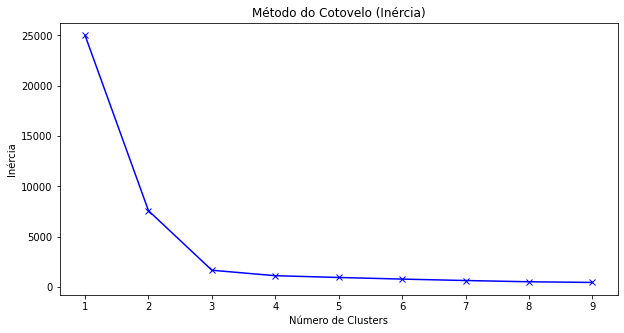

In [85]:
plt.figure(figsize = (10,5))
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo (Inércia)')
plt.show()

Como no ponto 4 a curva começa a ficar menos acentuada, iremos utilizar esse número para a quantidade de clusters:

In [86]:
model_km = KMeans(n_clusters = 4, random_state = 42).fit(df)

### 4. Clusterização utilizando o Kmeans

Centros dos _clusters_:

In [87]:
centros_clusters_km = pd.DataFrame(data = model_km.cluster_centers_, columns = df.columns)
centros_clusters_km.head() 

,Weight,Height
0,60.571088,169.405399
1,67.525246,175.984848
2,53.600298,162.764782
3,63.526170,169.933439


Integrando os clusters ao dataframe:

In [88]:
df['cluster_km'] = model_km.labels_

### 5. Clusterização utilizando o MeanShift

Criando e _fittando_ o modelo:

In [89]:
model_msc = MeanShift().fit(df.drop(columns = 'cluster_km'))

Centro dos _clusters_:

In [90]:
centros_clusters_msc = pd.DataFrame(data = model_msc.cluster_centers_, 
                                    columns = df.drop(columns = 'cluster_km').columns)
centros_clusters_msc.head()

,Weight,Height
0,62.028292,169.718197
1,67.353332,175.637863
2,53.600298,162.764782


Integrando os _clusters_ ao dataframe:

In [91]:
df['cluster_msc'] = model_msc.labels_

### 6. Comparação Visual dos Métodos

<AxesSubplot:title={'center':'Método Meanshift'}, xlabel='Weight', ylabel='Height'>

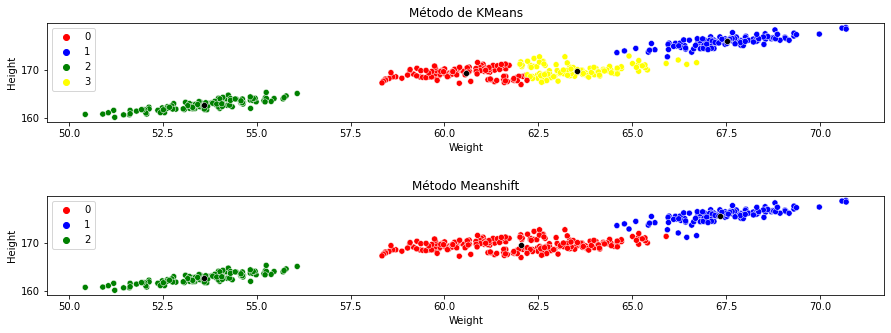

In [92]:
fig, axes = plt.subplots(2, 1, figsize = (15, 5))
axes[0].set_title('Método de KMeans')
sns.scatterplot(ax = axes[0], data = df, x = 'Weight', y = 'Height', hue = 'cluster_km', palette = ['red', 'blue', 'green', 'yellow'])
sns.scatterplot(ax = axes[0], data = centros_clusters_km, x = 'Weight', y = 'Height', color = 'black')
plt.subplots_adjust(hspace = 0.75)
axes[1].set_title('Método Meanshift')
sns.scatterplot(ax = axes[1], data = df, x = 'Weight', y = 'Height', hue = 'cluster_msc', palette = ['red', 'blue', 'green'])
sns.scatterplot(ax = axes[1], data = centros_clusters_msc, x = 'Weight', y = 'Height', color = 'black')

Ao considerarmos o gráfico de dispersão elaborado no início dessa análise e os gráficos plotados na etapa anterior, chegamos a conclusão de que o método _KMeans_ atingiu um resultado mais satisfatório por ter _clusterizado_ o banco de dados em 4 grupos ao invés de 3, como fez o método _meanshift_.